<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_cluster_groupwise_0_3_0_7_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.3_0.7'

In [8]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n20.csv')

In [9]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,0.260884,200.884577,200.922837,-0.038260
1,0.0,1.0,57.329540,67.934475,53.739469,0.672184,189.675668,188.920509,0.755159
2,0.0,2.0,45.215694,51.000161,43.520343,0.096332,149.832530,149.849286,-0.016756
3,0.0,3.0,69.375325,41.455180,64.082408,-1.407479,183.505433,185.222378,-1.716945
4,0.0,4.0,87.837297,72.508079,90.676124,-0.153401,260.868100,260.948041,-0.079942
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.128871,52.821992,47.857948,0.984430,149.793241,148.475646,1.317595
19996,999.0,16.0,54.087773,71.546904,29.974359,-0.042693,165.566343,165.109862,0.456481
19997,999.0,17.0,68.944318,94.015145,59.585539,1.201877,233.746879,232.854010,0.892869
19998,999.0,18.0,51.662996,72.680956,79.621892,-0.408919,213.556926,214.455073,-0.898147


In [10]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  40.586643  81.182530  ...  200.884577  200.922837 -0.038260
      1.0    57.329540  67.934475  53.739469  ...  189.675668  188.920509  0.755159
      2.0    45.215694  51.000161  43.520343  ...  149.832530  149.849286 -0.016756
      3.0    69.375325  41.455180  64.082408  ...  183.505433  185.222378 -1.716945
      4.0    87.837297  72.508079  90.676124  ...  260.868100  260.948041 -0.079942
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   38.128871  52.821992  47.857948  ...  149.793241  148.475646  1.317595
      16.0   54.087773  71.546904  29.974359  ...  165.566343  165.109862  0.456481
      17.0   68.944318  94.015145  59.585539  ...  233.746879  232.854010  0.892869
      18.0   51.662996  72.680956  79.621892  ...  213.556926  214.455073 -0.898147
      19.0   36.400528  83.517969  40.981980  ...  170.321841  170.804250 -0.482408

[20000 rows x 7 columns]

In [11]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  40.586643  81.182530  ...  200.884577  200.922837 -0.038260
      1.0    57.329540  67.934475  53.739469  ...  189.675668  188.920509  0.755159
      2.0    45.215694  51.000161  43.520343  ...  149.832530  149.849286 -0.016756
      3.0    69.375325  41.455180  64.082408  ...  183.505433  185.222378 -1.716945
      4.0    87.837297  72.508079  90.676124  ...  260.868100  260.948041 -0.079942
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   38.128871  52.821992  47.857948  ...  149.793241  148.475646  1.317595
      16.0   54.087773  71.546904  29.974359  ...  165.566343  165.109862  0.456481
      17.0   68.944318  94.015145  59.585539  ...  233.746879  232.854010  0.892869
      18.0   51.662996  72.680956  79.621892  ...  213.556926  214.455073 -0.898147
      19.0   36.400528  83.517969  40.981980  ...  170.321841  170.804250 -0.482408

[20000 rows x 7 columns]

In [12]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,0.260884,200.884577,200.922837,-0.038260
1,0.0,1.0,57.329540,67.934475,53.739469,0.672184,189.675668,188.920509,0.755159
2,0.0,2.0,45.215694,51.000161,43.520343,0.096332,149.832530,149.849286,-0.016756
3,0.0,3.0,69.375325,41.455180,64.082408,-1.407479,183.505433,185.222378,-1.716945
4,0.0,4.0,87.837297,72.508079,90.676124,-0.153401,260.868100,260.948041,-0.079942
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.128871,52.821992,47.857948,0.984430,149.793241,148.475646,1.317595
19996,999.0,16.0,54.087773,71.546904,29.974359,-0.042693,165.566343,165.109862,0.456481
19997,999.0,17.0,68.944318,94.015145,59.585539,1.201877,233.746879,232.854010,0.892869
19998,999.0,18.0,51.662996,72.680956,79.621892,-0.408919,213.556926,214.455073,-0.898147


In [13]:
table.set_index(['rep', 'index'], inplace=True)

In [14]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  40.586643  81.182530  ...  200.884577  200.922837 -0.038260
      1.0    57.329540  67.934475  53.739469  ...  189.675668  188.920509  0.755159
      2.0    45.215694  51.000161  43.520343  ...  149.832530  149.849286 -0.016756
      3.0    69.375325  41.455180  64.082408  ...  183.505433  185.222378 -1.716945
      4.0    87.837297  72.508079  90.676124  ...  260.868100  260.948041 -0.079942
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   38.128871  52.821992  47.857948  ...  149.793241  148.475646  1.317595
      16.0   54.087773  71.546904  29.974359  ...  165.566343  165.109862  0.456481
      17.0   68.944318  94.015145  59.585539  ...  233.746879  232.854010  0.892869
      18.0   51.662996  72.680956  79.621892  ...  213.556926  214.455073 -0.898147
      19.0   36.400528  83.517969  40.981980  ...  170.321841  170.804250 -0.482408

[20000 rows x 7 columns]

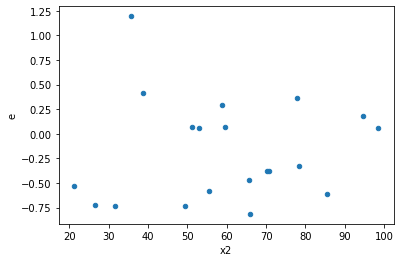

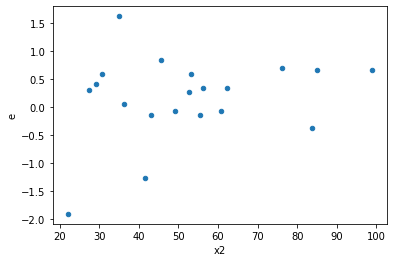

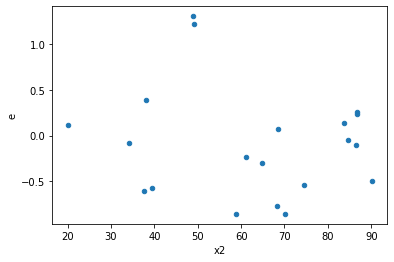

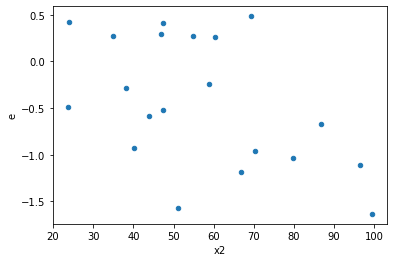

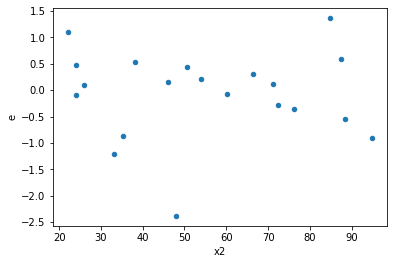

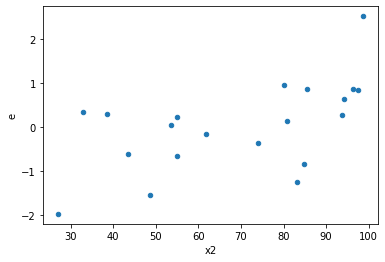

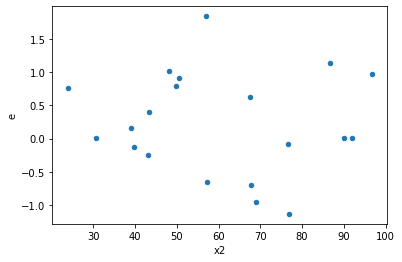

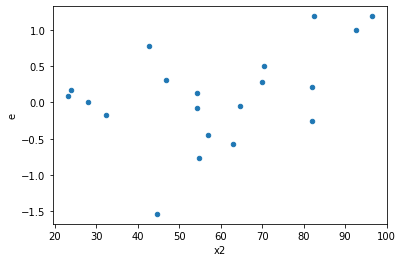

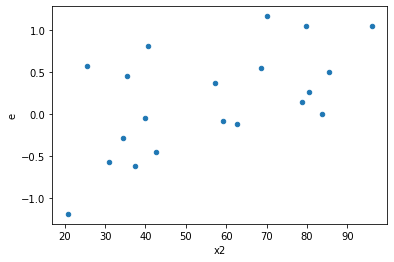

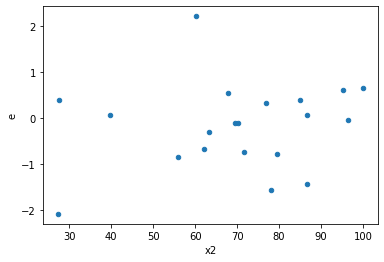

In [15]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [16]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero 

In [17]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
4.0,9.0,5.0,2.528259854762348,1.7511458820257253,0.3160324818452935,0.4377864705064313,1.2467320484122444,0.7274788519970692,0.6362605740014654,Reject005=1 : Homoscedasticity
7.0,6.0,8.0,1.976141285963872,4.666535720100322,0.39522825719277443,0.6666479600143317,1.7710787254607396,0.5021162259051133,0.7489418870474434,Reject005=1 : Homoscedasticity
8.0,9.0,5.0,3.017048479372915,1.6268705395854317,0.3771310599216144,0.4067176348963579,0.9706065352527679,0.968041591175389,0.5159792044123055,Reject005=1 : Homoscedasticity
11.0,3.0,11.0,0.5723938989552219,8.347729902966988,0.28619694947761093,0.8347729902966987,3.9774246616807307,0.282600879493609,0.8586995602531955,Reject005=1 : Homoscedasticity
16.0,2.0,12.0,0.03213870420557213,9.707427758499033,0.03213870420557213,0.8824934325908212,50.341314823016326,0.039272473600234115,0.9803637631998829,Reject005=0 : Heteroscedasticity
17.0,6.0,8.0,1.0529907872855526,4.040182525815401,0.21059815745711052,0.577168932259343,2.8776480582254425,0.21468523096068126,0.8926573845196594,Reject005=1 : Homoscedasticity
19.0,5.0,9.0,0.42503658744825357,8.640402394476817,0.10625914686206339,1.0800502993096022,11.293671402044955,0.015745706241564017,0.992127146879218,Reject005=0 : Heteroscedasticity
22.0,7.0,7.0,0.6315701910977157,1.5047492695560636,0.10526169851628596,0.2507915449260106,2.3825527087348726,0.27472307303619603,0.862638463481902,Reject005=1 : Homoscedasticity
24.0,5.0,9.0,2.170556607610077,5.501895618049759,0.5426391519025192,0.6877369522562199,1.4082142184072475,0.7380842513017005,0.6309578743491497,Reject005=1 : Homoscedasticity


In [18]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,9.0,3.4443339600676164,5.419538681387654,0.8610834900169041,0.6774423351734568,0.8741471813999228,0.8089329050788989,Reject005=1 : Homoscedasticity
1.0,9.0,5.0,7.258729496362492,0.7206572564432373,0.9073411870453115,0.18016431411080933,0.17870662658635703,0.07244103755809951,Reject005=1 : Homoscedasticity
2.0,2.0,12.0,1.164286524287038,3.152543205195423,1.164286524287038,0.28659483683594755,0.45128398944093157,0.3033938446686804,Reject005=1 : Homoscedasticity
3.0,11.0,3.0,8.14801914736499,0.7987932859070649,0.8148019147364989,0.39939664295353244,0.35946266964035783,0.43302737942974345,Reject005=1 : Homoscedasticity
4.0,9.0,5.0,2.528259854762348,1.7511458820257253,0.3160324818452935,0.4377864705064313,1.2467320484122444,1.2725211480029308,Reject005=1 : Homoscedasticity
5.0,4.0,10.0,1.3125003853033534,2.859726014051678,0.43750012843445113,0.31774733489463086,0.871535291287772,0.7784594291031811,Reject005=1 : Homoscedasticity
6.0,7.0,7.0,6.6938196647116595,2.0191186714382896,1.1156366107852767,0.33651977857304827,0.3016392392646366,0.13642828291348932,Reject005=1 : Homoscedasticity
7.0,6.0,8.0,1.976141285963872,4.666535720100322,0.39522825719277443,0.6666479600143317,1.7710787254607396,1.4978837740948867,Reject005=1 : Homoscedasticity
8.0,9.0,5.0,3.017048479372915,1.6268705395854317,0.3771310599216144,0.4067176348963579,0.9706065352527679,1.031958408824611,Reject005=1 : Homoscedasticity


In [19]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      895
Reject005=0 : Heteroscedasticity    105
Name: Result_test, dtype: int64